<a href="https://colab.research.google.com/github/biagfialho/DIVERSEDEV/blob/main/Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==4.0.0-rc1

# Libs

In [ ]:
from google.colab import userdata
from google.colab.patches import cv2_imshow
from googletrans import Translator

import requests

import cv2

import numpy as np

import warnings

# Environment Config

In [ ]:
API_KEY = userdata.get('APOD_NASA')

APOD_URL = 'https://api.nasa.gov/planetary/apod'

warnings.filterwarnings('ignore')

# Atividades

In [ ]:
def get_apod_data(day: int, month: int, year: int) -> dict:
  try:
    response = requests.get(
        url = APOD_URL,
        params={
          "api_key": API_KEY,
          "date": f"{year}-{month}-{day}",
          "hd": True
          },

        timeout=10
        )

    response.raise_for_status()

    response_status = response.status_code

    return response.json()

    '''if response.status_code == 200:
        print("Sucesso: dados obtidos corretamente.")
        return response.json()

    elif response.status_code == 401:
        print("Erro 401: chave da API inválida ou não autorizada.")

    elif response.status_code == 429:
        print("Erro 429: limite de requisições excedido. Tente novamente mais tarde.")

    else:
        print(f"Erro {response.status_code}: ocorreu um problema na requisição.")

    return None'''

  except requests.exceptions.Timeout as err:
          print(f"Erro de timeout.")

  except requests.exceptions.ConnectionError:
          print("Erro de Conexão: Verifique sua rede.")

  except Exception as e:
          print(f"Erro imprevisto: {e}")

  return None



In [ ]:
get_apod_data(8, 5, 2025)

{'date': '2025-05-08',
 'explanation': "Cataloged as M1, the Crab Nebula is the first on Charles Messier's famous list of things which are not comets. In fact, the Crab Nebula is now known to be a supernova remnant, an expanding cloud of debris from the death explosion of a massive star. The violent birth of the Crab was witnessed by astronomers in the year 1054. Roughly 10 light-years across, the nebula is still expanding at a rate of about 1,500 kilometers per second. You can see the expansion by comparing these sharp images from the Hubble Space Telescope and James Webb Space Telescope. The Crab's dynamic, fragmented filaments were captured in visible light by Hubble in 2005 and Webb in infrared light in 2023. This cosmic crustacean lies about 6,500 light-years away in the constellation Taurus.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2505/Crab_Webb_998.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'M1: The Incredible Expanding Crab',
 'url': 'https://apod.n

# Extras

In [ ]:
def show_apod_image(day: int, month: int, year: int, size_image: int) -> None:
  img_url = get_apod_data(day, month, year)['hdurl']

  img_response = requests.get(img_url)
  img_array = np.asarray(bytearray(img_response.content), dtype=np.uint8)
  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

  img = cv2.resize(img, (size_image, size_image))

  cv2_imshow(img)

In [ ]:
def show_apod_explanation(day: int, month: int, year: int) -> None:
  explanation = (get_apod_data(day, month, year)['explanation'])

  translator = Translator()

  result = translator.translate(explanation, src='en', dest='pt')

  print(result.text)

In [ ]:
get_apod_data(8, 5, 2025)

{'date': '2025-05-08',
 'explanation': "Cataloged as M1, the Crab Nebula is the first on Charles Messier's famous list of things which are not comets. In fact, the Crab Nebula is now known to be a supernova remnant, an expanding cloud of debris from the death explosion of a massive star. The violent birth of the Crab was witnessed by astronomers in the year 1054. Roughly 10 light-years across, the nebula is still expanding at a rate of about 1,500 kilometers per second. You can see the expansion by comparing these sharp images from the Hubble Space Telescope and James Webb Space Telescope. The Crab's dynamic, fragmented filaments were captured in visible light by Hubble in 2005 and Webb in infrared light in 2023. This cosmic crustacean lies about 6,500 light-years away in the constellation Taurus.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2505/Crab_Webb_998.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'M1: The Incredible Expanding Crab',
 'url': 'https://apod.n

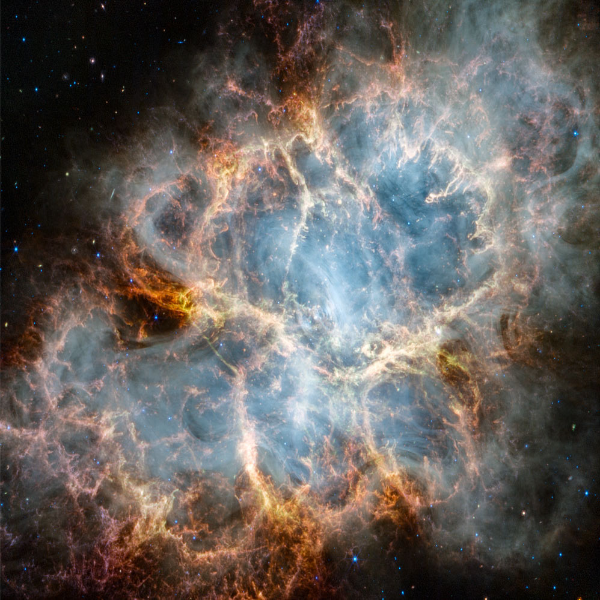

In [ ]:
show_apod_image(8, 5, 2025, 600)


In [ ]:
show_apod_explanation(8, 5, 2025)

Catalogada como M1, a Nebulosa do Caranguejo é a primeira na famosa lista de Charles Messier de coisas que não são cometas.Na verdade, sabe-se agora que a Nebulosa do Caranguejo é um remanescente de supernova, uma nuvem de detritos em expansão resultante da explosão mortal de uma estrela massiva.O nascimento violento do Caranguejo foi testemunhado pelos astrónomos no ano de 1054. Com cerca de 10 anos-luz de diâmetro, a nebulosa continua a expandir-se a uma velocidade de cerca de 1.500 quilómetros por segundo.Você pode ver a expansão comparando essas imagens nítidas do Telescópio Espacial Hubble e do Telescópio Espacial James Webb.Os filamentos dinâmicos e fragmentados do Caranguejo foram capturados em luz visível pelo Hubble em 2005 e por Webb em luz infravermelha em 2023. Este crustáceo cósmico fica a cerca de 6.500 anos-luz de distância, na constelação de Touro.
